Selenium 은 chromedriver를 제어하거나 원하는 정보를 얻기 위해 사용

In [1]:
import selenium
print(selenium.__version__)

4.26.0


In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# 기본 setting

from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup as bs
import time
import pandas as pd
import re  # 정규 표현식을 위한 모듈
#import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import os
import sys
import json
import requests
from dotenv import load_dotenv
from datetime import date


from konlpy.tag import Mecab

#load_dotenv()
#from naver_api_info import client_id, client_pw
# vs 에서 불러오기 
#import dbio

ModuleNotFoundError: No module named 'seaborn'

client_id = "k5K8PLgTE8lcRewiN6sA"
client_pw = "0i0fiO7U_D"

In [4]:
import requests
import re  # 정규 표현식을 위한 모듈

url = "https://openapi.naver.com/v1/search/blog.json"


client_id = "k5K8PLgTE8lcRewiN6sA"
client_pw = "0i0fiO7U_D"

payload = {'query': '명동', 'display': 100, 'start': 1, 'sort': 'date'}
headers = {"X-Naver-Client-Id": client_id, "X-Naver-Client-Secret": client_pw}

# 요청 보내기
r = requests.get(url, params=payload, headers=headers)
print(r.url)

# 상태 코드 확인
if r.status_code == 200:
    data = r.json()
    
    # 블로그 제목에서 '명동'이 포함된 것만 출력
    for item in data['items']:
        title = item['title']
        
        # '<b>'와 '</b>'를 제거하기 위해 정규 표현식 사용
        clean_title = re.sub(r'<\/?b>', '', title)  
        print(clean_title)
else:
    print("Error Code:", r.status_code)



https://openapi.naver.com/v1/search/blog.json?query=%EB%AA%85%EB%8F%99&display=100&start=1&sort=date
명동역 맛집 데이트나 연말모임으로 추천하는 바리에가타 명동점
서울 당일치기 루트 문화 경험부터 건강 챙기는 방법까지!
여수 리필되는 게장 맛집 풍자 또간집 - 명동 게장 주차장 및... 
박완서의 나목을 읽었다
10월의 일기
SEP
https://모밴10대산.com 콜밴 경남태그모음
영문법 동사 12시제 중등문법
명동 미쉐린 가이드 서울 '멘텐' | 소유라멘,탄탄멘
문짝 자동차 외제차 수입차 판금 도색 도장 덴트 as 수리... 
241031 와!진짜? 세상에 이런 일이 3회 예고 / 넉살 스페셜MC... 
서울/중구 - 팔레드신 (레스케이프 호텔 미쉐린 가이드 맛집... 
나인트리 바이 파르나스 서울 명동 2 정보 및 숙박후기
https://모밴10대산.com 콜밴 광주태그모음
(5컬러) 레더패치 골덴 피그 셔츠 / 남자골덴남방 골덴셔츠... 
서울 명동교자 본점 주차장 명동 미슐랑가이드 칼국수 맛집
중구 명동2가 '(주)평화순례여행사' 여행사 | 우리동네 정보마켓
[연합투데이]'세상에 이런일이' 넉살 스페셜MC , 있지, 류진... 
[대만여행]Day1! 인천공항-&gt;타오위안공항, 진천미, 펑다카페이... 
제주 조천 맛집 재방문 예정인 갈치 전문점
명동역고양이카페 데이트하기 좋은 고양이놀이터 명동점
여의도맛집 가양칼국수
16년 밑그림 마치고 첫삽…서울역 북부 '강북 코엑스'로 거듭날까
핀란드 산타할아버지, 한국 산타할아버지에게 편지쓰고 답장 받기
명동 춘리마라탕
24년 3분기 상업용부동산 임대동향조사 발표
종로/익선 (종로&amp;남산 1박2일) 서울 산책 여행, 익선동 온천집... 
10월 일상: 일단 내향인이라고 하겠습니다...근데 이제... 
[명동역] 쌀쌀한날 찰떡메뉴추천, 효담칼국수 닭한마리 명동본점
나인트리 바이 파르나스 서울 명동 2 (NINE TREE BY..

In [5]:
url = "https://openapi.naver.com/v1/search/blog.json"

client_id = "k5K8PLgTE8lcRewiN6sA"
client_pw = "0i0fiO7U_D"

payload = {'query': '명동', 'display': 100, 'start': 1, 'sort': 'date'}
headers = {"X-Naver-Client-Id": client_id, "X-Naver-Client-Secret": client_pw}

# 요청 보내기
r = requests.get(url, params=payload, headers=headers)
print(r.url)

# 상태 코드 확인
if r.status_code == 200:
    data = r.json()
    
    # 블로그 제목과 URL 함께 출력
    for item in data['items']:
        title = item['title']
        
        # '<b>'와 '</b>'를 제거하기 위해 정규 표현식 사용
        clean_title = re.sub(r'<\/?b>', '', title)  
        link = item['link']  # 블로그 URL

        print(f"제목: {clean_title}\nURL: {link}\n")
else:
    print("Error Code:", r.status_code)

https://openapi.naver.com/v1/search/blog.json?query=%EB%AA%85%EB%8F%99&display=100&start=1&sort=date
제목: 여수 리필되는 게장 맛집 풍자 또간집 - 명동 게장 주차장 및... 
URL: https://blog.naver.com/komsuni1245/223641175595

제목: 박완서의 나목을 읽었다
URL: https://blog.naver.com/frenchto/223641171576

제목: 10월의 일기
URL: https://blog.naver.com/soulandsystem/223641169822

제목: SEP
URL: https://blog.naver.com/suuuu_k/223641168178

제목: https://모밴10대산.com 콜밴 경남태그모음
URL: https://blog.naver.com/zckorea1000/223641167899

제목: 영문법 동사 12시제 중등문법
URL: https://blog.naver.com/blissfulday230701/223641165578

제목: 명동 미쉐린 가이드 서울 '멘텐' | 소유라멘,탄탄멘
URL: https://blog.naver.com/dlawofla104/223641164526

제목: 문짝 자동차 외제차 수입차 판금 도색 도장 덴트 as 수리... 
URL: https://blog.naver.com/riiopiel888/223639366412

제목: 241031 와!진짜? 세상에 이런 일이 3회 예고 / 넉살 스페셜MC... 
URL: https://blog.naver.com/kbmbc_8919/223641164602

제목: 서울/중구 - 팔레드신 (레스케이프 호텔 미쉐린 가이드 맛집... 
URL: https://blog.naver.com/dyjd11/223641164097

제목: 나인트리 바이 파르나스 서울 명동 2 정보 및 숙박후기
URL: https://blog.naver.com/kk

In [6]:
import requests
import re
import pandas as pd
from konlpy.tag import Mecab
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import koreanize_matplotlib

In [7]:
# 네이버 API에서 데이터 수집
url = "https://openapi.naver.com/v1/search/blog.json"
client_id = "k5K8PLgTE8lcRewiN6sA"
client_pw = "0i0fiO7U_D"

payload = {'query': '명동', 'display': 100, 'start': 1, 'sort': 'date'}
headers = {"X-Naver-Client-Id": client_id, "X-Naver-Client-Secret": client_pw}
response = requests.get(url, params=payload, headers=headers)
data = response.json()

# 블로그 제목 추출
titles = [re.sub(r'<\/?b>', '', item['title']) for item in data['items']]
data = pd.DataFrame(titles, columns=['description'])

# 한국어 불용어 로드
stopwords = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/%ED%95%9C%EA%B5%AD%EC%96%B4%EB%B6%88%EC%9A%A9%EC%96%B4100.txt", header=None)
stopwords = list(stopwords[0])
stopwords.extend(['들', '나', '된', '과', '은', '가', '에', '것', '수', '곳'])



In [8]:
# mecab 테스트

from konlpy.tag import Mecab

mecab = Mecab()
print(mecab.pos("Mecab 설치 오류 해결!!"))

[('Mecab', 'SL'), ('설치', 'NNG'), ('오류', 'NNG'), ('해결', 'NNG'), ('!', 'SF'), ('!', 'SF')]


In [9]:
# 명사 추출
mecab = Mecab()
data['description2'] = data['description'].apply(lambda x: mecab.nouns(x))

In [10]:
# 불용어 제거 및 단어 리스트 생성
word_dist = []
for words in data['description2']:
    for word in words:
        if word not in stopwords:
            word_dist.append(word)

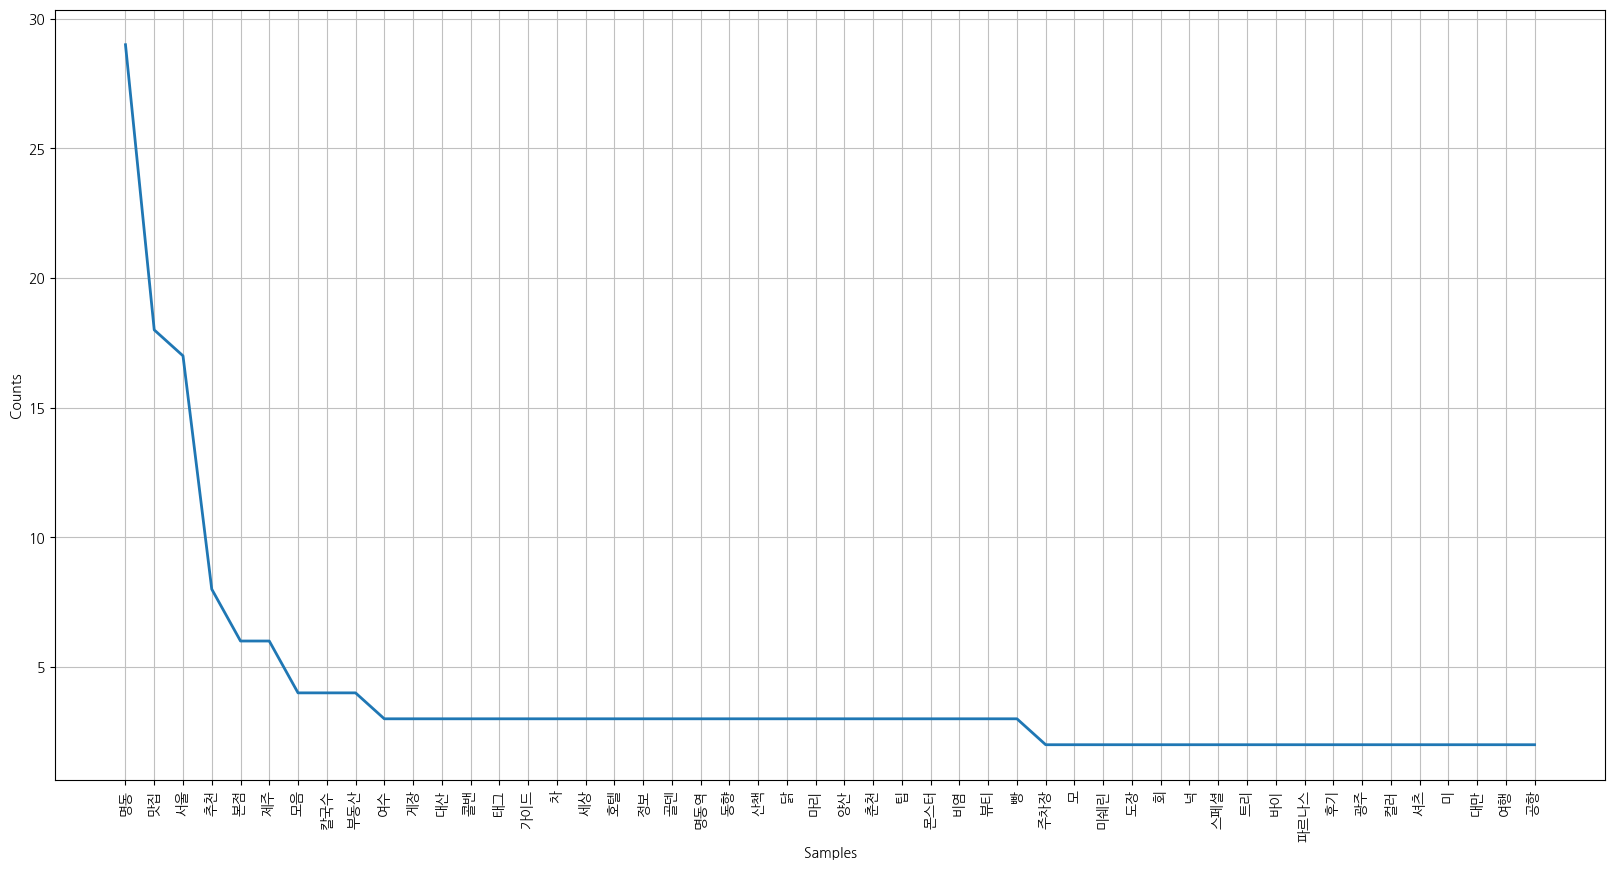

In [11]:
# 단어 빈도수 시각화
plt.figure(figsize=(20, 10))
FreqDist(word_dist).plot(50)
plt.show()


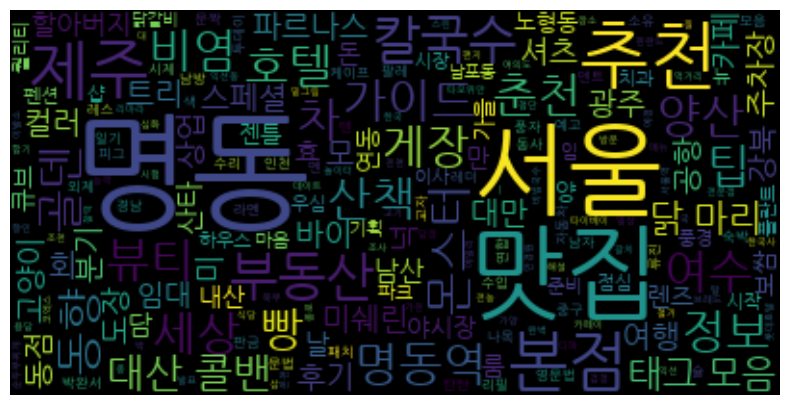

In [12]:
# 워드 클라우드 생성
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
plt.figure(figsize=(10, 5))
wc = WordCloud(font_path=font_path, background_color='black').generate(" ".join(word_dist))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
stopwords

['이',
 '있',
 '하',
 '것',
 '들',
 '그',
 '되',
 '수',
 '왜',
 '뭐',
 '거',
 '해',
 '저',
 '너',
 '건',
 '은',
 '걸',
 '진짜',
 '보',
 '않',
 '없',
 '나',
 '사람',
 '주',
 '아니',
 '등',
 '같',
 '우리',
 '때',
 '년',
 '가',
 '한',
 '지',
 '대하',
 '오',
 '말',
 '일',
 '그렇',
 '위하',
 '때문',
 '그것',
 '두',
 '말하',
 '알',
 '그러나',
 '받',
 '못하',
 '일',
 '그런',
 '또',
 '문제',
 '더',
 '사회',
 '많',
 '그리고',
 '좋',
 '크',
 '따르',
 '중',
 '나오',
 '가지',
 '씨',
 '시키',
 '만들',
 '지금',
 '생각하',
 '그러',
 '속',
 '하나',
 '집',
 '살',
 '모르',
 '적',
 '월',
 '데',
 '자신',
 '안',
 '어떤',
 '내',
 '내',
 '경우',
 '명',
 '생각',
 '시간',
 '그녀',
 '다시',
 '이런',
 '앞',
 '보이',
 '번',
 '나',
 '다른',
 '어떻',
 '여자',
 '개',
 '전',
 '들',
 '사실',
 '이렇',
 '점',
 '싶',
 '말',
 '정도',
 '좀',
 '원',
 '잘',
 '통하',
 '소리',
 '놓',
 '들',
 '나',
 '된',
 '과',
 '은',
 '가',
 '에',
 '것',
 '수',
 '곳']

In [14]:
word_dist

['여수',
 '리필',
 '게장',
 '맛집',
 '풍자',
 '명동',
 '게장',
 '주차장',
 '박완서',
 '나목',
 '일기',
 '모',
 '대산',
 '콜밴',
 '경남',
 '태그',
 '모음',
 '영문법',
 '동사',
 '시제',
 '문법',
 '명동',
 '미쉐린',
 '가이드',
 '서울',
 '텐',
 '소유',
 '라멘',
 '탄탄',
 '멘',
 '문짝',
 '자동차',
 '외제',
 '차',
 '수입',
 '차',
 '판금',
 '색',
 '도장',
 '덴트',
 '수리',
 '세상',
 '회',
 '예고',
 '넉',
 '스페셜',
 '서울',
 '중구',
 '팔레',
 '레스',
 '케이프',
 '호텔',
 '미쉐린',
 '가이드',
 '맛집',
 '트리',
 '바이',
 '파르나스',
 '서울',
 '명동',
 '정보',
 '숙박',
 '후기',
 '모',
 '대산',
 '콜밴',
 '광주',
 '태그',
 '모음',
 '컬러',
 '레더',
 '패치',
 '골덴',
 '피그',
 '셔츠',
 '남자',
 '골덴',
 '남방',
 '골덴',
 '셔츠',
 '서울',
 '명동',
 '교자',
 '본점',
 '주차장',
 '명동',
 '미',
 '슐',
 '가이드',
 '칼국수',
 '맛집',
 '연합',
 '투데이',
 '세상',
 '넉',
 '스페셜',
 '류진',
 '대만',
 '여행',
 '인천',
 '공항',
 '타오위안',
 '공항',
 '진천',
 '미',
 '카페이',
 '제주',
 '조천',
 '맛집',
 '방문',
 '예정',
 '갈치',
 '전문점',
 '명동역',
 '고양이',
 '카페',
 '데이트',
 '고양이',
 '놀이터',
 '동점',
 '여의도',
 '맛집',
 '가양',
 '칼국수',
 '밑그림',
 '삽',
 '서울역',
 '북부',
 '강북',
 '코엑스',
 '분기',
 '상업',
 '부동산',
 '임대',
 '동향',
 '조사',
 '발표',
 '핀란드',
 '산타',
 '할아버지',

# word2vec
Word2Vec는 단어를 벡터로 표현하는 단어 임베딩(word embedding) 기법 중 하나로, 비슷한 의미를 가진 단어들이 벡터 공간에서 서로 가깝게 위치하도록 학습하는 방법이다. 구글에서 2013년에 발표한 모델이며, 자연어 처리 분야에서 단어 간의 의미적 유사성을 수치적으로 표현하는 데 사용된다.

In [15]:
# 상태 코드 확인
if r.status_code == 200:
    data = r.json()
    
    # 블로그 제목에서 '명동'이 포함된 것만 출력
    for item in data['items']:
        title = item['title']
        
        # '<b>'와 '</b>'를 제거하기 위해 정규 표현식 사용
        clean_title = re.sub(r'<\/?b>', '', title)  
        print(clean_title)
else:
    print("Error Code:", r.status_code)

여수 리필되는 게장 맛집 풍자 또간집 - 명동 게장 주차장 및... 
박완서의 나목을 읽었다
10월의 일기
SEP
https://모밴10대산.com 콜밴 경남태그모음
영문법 동사 12시제 중등문법
명동 미쉐린 가이드 서울 '멘텐' | 소유라멘,탄탄멘
문짝 자동차 외제차 수입차 판금 도색 도장 덴트 as 수리... 
241031 와!진짜? 세상에 이런 일이 3회 예고 / 넉살 스페셜MC... 
서울/중구 - 팔레드신 (레스케이프 호텔 미쉐린 가이드 맛집... 
나인트리 바이 파르나스 서울 명동 2 정보 및 숙박후기
https://모밴10대산.com 콜밴 광주태그모음
(5컬러) 레더패치 골덴 피그 셔츠 / 남자골덴남방 골덴셔츠... 
서울 명동교자 본점 주차장 명동 미슐랑가이드 칼국수 맛집
[연합투데이]'세상에 이런일이' 넉살 스페셜MC , 있지, 류진... 
[대만여행]Day1! 인천공항-&gt;타오위안공항, 진천미, 펑다카페이... 
제주 조천 맛집 재방문 예정인 갈치 전문점
명동역고양이카페 데이트하기 좋은 고양이놀이터 명동점
여의도맛집 가양칼국수
16년 밑그림 마치고 첫삽…서울역 북부 '강북 코엑스'로 거듭날까
24년 3분기 상업용부동산 임대동향조사 발표
핀란드 산타할아버지, 한국 산타할아버지에게 편지쓰고 답장 받기
명동 춘리마라탕
종로/익선 (종로&amp;남산 1박2일) 서울 산책 여행, 익선동 온천집... 
10월 일상: 일단 내향인이라고 하겠습니다...근데 이제... 
나인트리 바이 파르나스 서울 명동 2 (NINE TREE BY... 
[명동역] 쌀쌀한날 찰떡메뉴추천, 효담칼국수 닭한마리 명동본점
[대만] 타이베이 3대 야시장 놀거리/먹거리 추천 스린 야시장
양산 명동 합기도장 철거
10월!↕️
제주 용담 맛집 모든 걸 완벽하게 가친 식당 제주 전농로 맛집
광주 첨단 보쌈 비빔국수 순두부찌개 내돈내산 맛집 명동보쌈국... 
아큐브 컬러렌즈 ㅣ아큐브디파인렌즈 | 춘천 안경원
● 제71회 한국사능력검정시험 심화 해설 【30번 ~ 36번】
[서울 명동] 롯

In [16]:
# Word2vec 테스트

from gensim.models import Word2Vec

# Word2Vec 간단히 테스트
sentences = [["I", "love", "data"], ["Data", "science", "is", "awesome"]]
model = Word2Vec(sentences, vector_size=10, window=5, min_count=1, workers=2)
print(model.wv['data'])


[-0.0960355   0.05007293 -0.08759586 -0.04391825 -0.000351   -0.00296181
 -0.0766124   0.09614743  0.04982058  0.09233143]


In [18]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec

In [20]:
# 3. DataFrame으로 변환
df = pd.DataFrame(titles, columns=['description'])

In [21]:
df

,description
0,여수 리필되는 게장 맛집 풍자 또간집 - 명동 게장 주차장 및...
1,박완서의 나목을 읽었다
2,10월의 일기
3,SEP
4,https://모밴10대산.com 콜밴 경남태그모음
...,...
95,"11월, 견인불발(堅忍不拔)의 만추가경(晩秋佳景) 마음 담아..."
96,명동역 오공일 음식점 전통 한식의 진수를 경험하세요
97,더이로운노인주간보호센터 - 양산시 북부동 장기요양기관...
98,"2024,10월"


In [22]:
# 4. 명사 추출
mecab = Mecab()
df['nouns'] = df['description'].apply(lambda x: mecab.nouns(x))

In [23]:
# 5. Word2Vec 모델 학습을 위해 문장 리스트로 변환
sentences = df['nouns'].tolist()

In [24]:
# 6. Word2Vec 모델 학습
model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4, sg=0)

In [26]:
# 7. 유사 단어 찾기 (예: "명동" 관련 유사어)
word = "명동"  # 분석하고자 하는 단어
if word in model.wv:
    similar_words = model.wv.most_similar(word)
    print(f"'{word}'와 유사한 단어:\n")
    for word, similarity in similar_words:
        print(f"('{word}', {similarity})")
else:
    print(f"'{word}'가 모델에 존재하지 않습니다.")
    

'명동'와 유사한 단어:

('년', 0.21616199612617493)
('본점', 0.09309341013431549)
('곳', 0.02703891322016716)
('제주', 0.01647227630019188)
('맛집', -0.010959355160593987)
('추천', -0.02762463688850403)
('서울', -0.05229600891470909)
('일', -0.059876564890146255)
('월', -0.11166119575500488)


1. 정확순으로
2. 1000개 해보기, 페이지 수만 늘리기
3. 명사 vs 형태소

## 1) 명사 분석

In [27]:
import requests
import re  # 정규 표현식을 위한 모듈
from konlpy.tag import Mecab
import time

# 네이버 API 정보 설정
url = "https://openapi.naver.com/v1/search/blog.json"
client_id = "k5K8PLgTE8lcRewiN6sA"
client_pw = "0i0fiO7U_D"
headers = {"X-Naver-Client-Id": client_id, "X-Naver-Client-Secret": client_pw}

# 수집한 블로그 제목을 저장할 리스트
titles = []

# 1000개의 데이터를 수집하기 위해 페이지별로 요청
for start in range(1, 1001, 100):  # 100개씩 10회 반복
    payload = {'query': '명동', 'display': 100, 'start': start, 'sort': 'sim'}  # 정확순으로 설정
    
    # 요청 보내기
    r = requests.get(url, params=payload, headers=headers)
    print(r.url)
    
    # 상태 코드 확인
    if r.status_code == 200:
        data = r.json()
        
        # 블로그 제목에서 '명동'이 포함된 것만 수집
        for item in data['items']:
            title = item['title']
            clean_title = re.sub(r'<\/?b>', '', title)  # HTML 태그 제거
            titles.append(clean_title)
    else:
        print("Error Code:", r.status_code)
    
    # 과도한 요청 방지를 위해 딜레이 추가
    time.sleep(1)

# Mecab을 이용하여 명사만 추출
mecab = Mecab()
nouns = [mecab.nouns(title) for title in titles]

# 결과 출력 (명사 리스트 형식으로 출력)
for noun_list in nouns:
    print(noun_list)


https://openapi.naver.com/v1/search/blog.json?query=%EB%AA%85%EB%8F%99&display=100&start=1&sort=sim
https://openapi.naver.com/v1/search/blog.json?query=%EB%AA%85%EB%8F%99&display=100&start=101&sort=sim
https://openapi.naver.com/v1/search/blog.json?query=%EB%AA%85%EB%8F%99&display=100&start=201&sort=sim
https://openapi.naver.com/v1/search/blog.json?query=%EB%AA%85%EB%8F%99&display=100&start=301&sort=sim
https://openapi.naver.com/v1/search/blog.json?query=%EB%AA%85%EB%8F%99&display=100&start=401&sort=sim
https://openapi.naver.com/v1/search/blog.json?query=%EB%AA%85%EB%8F%99&display=100&start=501&sort=sim
https://openapi.naver.com/v1/search/blog.json?query=%EB%AA%85%EB%8F%99&display=100&start=601&sort=sim
https://openapi.naver.com/v1/search/blog.json?query=%EB%AA%85%EB%8F%99&display=100&start=701&sort=sim
https://openapi.naver.com/v1/search/blog.json?query=%EB%AA%85%EB%8F%99&display=100&start=801&sort=sim
https://openapi.naver.com/v1/search/blog.json?query=%EB%AA%85%EB%8F%99&display=100&s

In [28]:
# Word2Vec 모델 학습
model = Word2Vec(sentences=nouns, vector_size=100, window=5, min_count=5, workers=4, sg=0)

In [29]:
# 특정 단어와 유사한 단어 출력 (예: '명동')
word = "명동"
if word in model.wv:
    similar_words = model.wv.most_similar(word)
    print(f"'{word}'와 유사한 단어:")
    for similar_word, similarity in similar_words:
        print(f"('{similar_word}', {similarity})")
else:
    print(f"'{word}'가 Word2Vec 모델에 존재하지 않습니다.")

'명동'와 유사한 단어:
('맛집', 0.9990782141685486)
('서울', 0.9987788796424866)
('집', 0.9984270930290222)
('스토어', 0.9982424378395081)
('명동역', 0.9982265830039978)
('본점', 0.9981969594955444)
('추천', 0.9981802105903625)
('후기', 0.9981513619422913)
('팝업', 0.9979183077812195)
('명', 0.9977511167526245)


In [30]:
# 단어 빈도수를 기반으로 워드 클라우드 데이터 생성
word_freq = {word: model.wv.get_vecattr(word, "count") for word in model.wv.index_to_key}

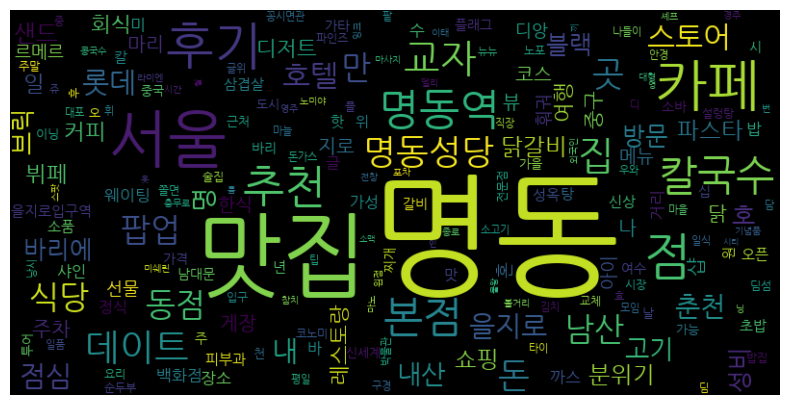

In [32]:
# 워드 클라우드 생성
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='black', 
    font_path="/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 한글 폰트 경로
).generate_from_frequencies(word_freq)

# 워드 클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## 2) 형태소 분석

In [33]:
import requests
import re
from konlpy.tag import Mecab
import time
from gensim.models import Word2Vec
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 네이버 API 정보 설정
url = "https://openapi.naver.com/v1/search/blog.json"
client_id = "k5K8PLgTE8lcRewiN6sA"
client_pw = "0i0fiO7U_D"
headers = {"X-Naver-Client-Id": client_id, "X-Naver-Client-Secret": client_pw}

# 수집한 블로그 제목을 저장할 리스트
titles = []

# 1000개의 데이터를 수집하기 위해 페이지별로 요청
for start in range(1, 1001, 100):  # 100개씩 10회 반복
    payload = {'query': '명동', 'display': 100, 'start': start, 'sort': 'sim'}  # 정확순으로 설정
    
    # 요청 보내기
    r = requests.get(url, params=payload, headers=headers)
    print(r.url)
    
    # 상태 코드 확인
    if r.status_code == 200:
        data = r.json()
        
        # 블로그 제목에서 '명동'이 포함된 것만 수집
        for item in data['items']:
            title = item['title']
            clean_title = re.sub(r'<\/?b>', '', title)  # HTML 태그 제거
            titles.append(clean_title)
    else:
        print("Error Code:", r.status_code)
    
    # 과도한 요청 방지를 위해 딜레이 추가
    time.sleep(1)

https://openapi.naver.com/v1/search/blog.json?query=%EB%AA%85%EB%8F%99&display=100&start=1&sort=sim
https://openapi.naver.com/v1/search/blog.json?query=%EB%AA%85%EB%8F%99&display=100&start=101&sort=sim
https://openapi.naver.com/v1/search/blog.json?query=%EB%AA%85%EB%8F%99&display=100&start=201&sort=sim
https://openapi.naver.com/v1/search/blog.json?query=%EB%AA%85%EB%8F%99&display=100&start=301&sort=sim
https://openapi.naver.com/v1/search/blog.json?query=%EB%AA%85%EB%8F%99&display=100&start=401&sort=sim
https://openapi.naver.com/v1/search/blog.json?query=%EB%AA%85%EB%8F%99&display=100&start=501&sort=sim
https://openapi.naver.com/v1/search/blog.json?query=%EB%AA%85%EB%8F%99&display=100&start=601&sort=sim
https://openapi.naver.com/v1/search/blog.json?query=%EB%AA%85%EB%8F%99&display=100&start=701&sort=sim
https://openapi.naver.com/v1/search/blog.json?query=%EB%AA%85%EB%8F%99&display=100&start=801&sort=sim
https://openapi.naver.com/v1/search/blog.json?query=%EB%AA%85%EB%8F%99&display=100&s

In [34]:
# Mecab을 이용하여 명사, 동사, 형용사 추출
mecab = Mecab()

# 원하는 품사 (NNG: 일반명사, NNP: 고유명사, VV: 동사, VA: 형용사)
target_pos = ['NNG', 'NNP', 'VV', 'VA']
selected_words = []

# 각 제목에서 품사별 단어를 선택
for title in titles:
    morphs = mecab.pos(title)  # 형태소와 품사 분석
    words = [word for word, pos in morphs if pos in target_pos]
    selected_words.append(words)  # 선택된 품사 단어만 추가

In [35]:
# Word2Vec 모델 학습
model = Word2Vec(sentences=selected_words, vector_size=100, window=5, min_count=5, workers=4, sg=0)

In [36]:
# 특정 단어와 유사한 단어 출력 (예: '명동')
word = "명동"
if word in model.wv:
    similar_words = model.wv.most_similar(word)
    print(f"'{word}'와 유사한 단어:")
    for similar_word, similarity in similar_words:
        print(f"('{similar_word}', {similarity})")
else:
    print(f"'{word}'가 Word2Vec 모델에 존재하지 않습니다.")

# 단어 빈도수를 기반으로 워드 클라우드 데이터 생성
word_freq = {word: model.wv.get_vecattr(word, "count") for word in model.wv.index_to_key}

'명동'와 유사한 단어:
('맛집', 0.9989491701126099)
('추천', 0.9983038306236267)
('좋', 0.9981527328491211)
('카페', 0.9979875683784485)
('명동역', 0.9976627826690674)
('뷔페', 0.9975816011428833)
('서울', 0.9974653720855713)
('집', 0.9974451661109924)
('분위기', 0.9973463416099548)
('곳', 0.9972769618034363)


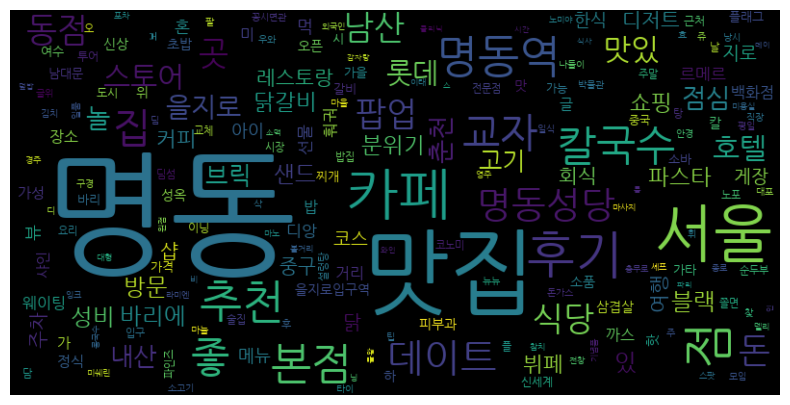

In [38]:
# 워드 클라우드 생성
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='black', 
    font_path="/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 한글 폰트 경로
).generate_from_frequencies(word_freq)

# 워드 클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [39]:
import requests
import re
import time

# 네이버 API 정보 설정
url = "https://openapi.naver.com/v1/search/blog.json"
client_id = "k5K8PLgTE8lcRewiN6sA"
client_pw = "0i0fiO7U_D"
headers = {"X-Naver-Client-Id": client_id, "X-Naver-Client-Secret": client_pw}

# 수집한 블로그 제목을 저장할 리스트
titles = []

# 1000개의 데이터를 수집하기 위해 페이지별로 요청
for start in range(1, 1001, 100):  # 100개씩 10회 반복
    payload = {'query': '명동', 'display': 100, 'start': start, 'sort': 'sim'}  # 정확도 순으로 정렬
    
    # 요청 보내기
    r = requests.get(url, params=payload, headers=headers)
    print(f"요청 URL: {r.url}")
    
    # 상태 코드 확인
    if r.status_code == 200:
        data = r.json()
        
        # 블로그 제목에서 HTML 태그 제거 후 제목 리스트에 추가
        for item in data['items']:
            title = item['title']
            clean_title = re.sub(r'<\/?b>', '', title)  # HTML 태그 제거
            titles.append(clean_title)
    else:
        print("Error Code:", r.status_code)
    
    # 과도한 요청 방지를 위해 딜레이 추가
    time.sleep(1)

# 제목 리스트 출력 (1000개 수집 완료)
print("수집된 블로그 제목 수:", len(titles))
for title in titles:
    print(title)


요청 URL: https://openapi.naver.com/v1/search/blog.json?query=%EB%AA%85%EB%8F%99&display=100&start=1&sort=sim
요청 URL: https://openapi.naver.com/v1/search/blog.json?query=%EB%AA%85%EB%8F%99&display=100&start=101&sort=sim
요청 URL: https://openapi.naver.com/v1/search/blog.json?query=%EB%AA%85%EB%8F%99&display=100&start=201&sort=sim
요청 URL: https://openapi.naver.com/v1/search/blog.json?query=%EB%AA%85%EB%8F%99&display=100&start=301&sort=sim
요청 URL: https://openapi.naver.com/v1/search/blog.json?query=%EB%AA%85%EB%8F%99&display=100&start=401&sort=sim
요청 URL: https://openapi.naver.com/v1/search/blog.json?query=%EB%AA%85%EB%8F%99&display=100&start=501&sort=sim
요청 URL: https://openapi.naver.com/v1/search/blog.json?query=%EB%AA%85%EB%8F%99&display=100&start=601&sort=sim
요청 URL: https://openapi.naver.com/v1/search/blog.json?query=%EB%AA%85%EB%8F%99&display=100&start=701&sort=sim
요청 URL: https://openapi.naver.com/v1/search/blog.json?query=%EB%AA%85%EB%8F%99&display=100&start=801&sort=sim
요청 URL: http